In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Define image size and batch size
IMG_SIZE = 224
BATCH_SIZE = 32

In [ ]:
train_datagen =ImageDataGenerator(rescale=1./255,validation_split=0.2)


In [ ]:
train_generator = train_datagen.flow_from_directory(
 "/content/drive/MyDrive/seg_train",
 target_size=(IMG_SIZE, IMG_SIZE),
 batch_size=BATCH_SIZE,
 class_mode='categorical',
 subset='training'
)
val_generator = train_datagen.flow_from_directory(
 r"/content/drive/MyDrive/seg_train",
 target_size=(IMG_SIZE, IMG_SIZE),
 batch_size=BATCH_SIZE,
 class_mode='categorical',
 subset='validation'
)

Found 5709 images belonging to 6 classes.
Found 1424 images belonging to 6 classes.


In [ ]:
class_indices = train_generator.class_indices
class_names = list(class_indices.keys())
print("Class indices:", class_indices)
print("Class names:", class_names)

Class indices: {'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}
Class names: ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


In [ ]:
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE,IMG_SIZE,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(6, activation='softmax') # Change the number of neurons to match the number of classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # Use categorical_crossentropy for multi-class classification

model.fit(train_generator,validation_data=val_generator,epochs=10)

Epoch 1/10
53/53 [==============================] - 227s 4s/step - loss: 0.0360 - accuracy: 0.9811 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
53/53 [==============================] - 227s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
53/53 [==============================] - 225s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
53/53 [==============================] - 221s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
53/53 [==============================] - 226s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
53/53 [==============================] - 218s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
53/53 [==============================] - 225s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_l

In [ ]:
model.save('Image_classifier.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
model = load_model("/content/drive/MyDrive/Image_classifier.h5")
print("model loaded")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


model loaded


In [ ]:
#load and preprocess the test image
test_image_path="/content/building img.jpeg"
img=image.load_img(test_image_path,target_size=(224,224))
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)

In [ ]:
img_array/= 255. #normalize the pixel value
prediction=model.predict(img_array)
print(prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
[[9.9952590e-01 1.2200603e-09 4.2286410e-06 2.3172128e-04 2.3670273e-04
  1.4846391e-06]]


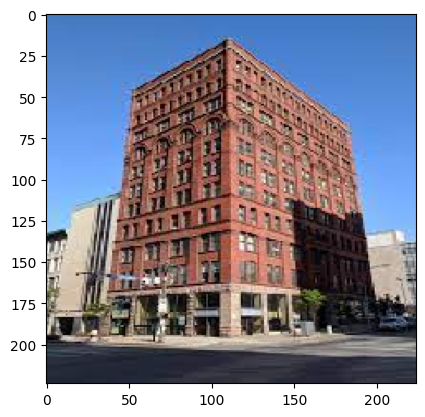

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
[[9.9952590e-01 1.2200603e-09 4.2286410e-06 2.3172128e-04 2.3670273e-04
  1.4846391e-06]]


In [ ]:
# Load and view the image
from matplotlib import pyplot as plt
test_image_path = '/content/building img.jpeg'
img = image.load_img(test_image_path, target_size=(224, 224))
plt.imshow(img)
plt.axis()
plt.show()
#convert image into array
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255. # Normalize the pixel values
# Make predictions
prediction = model.predict(img_array)
# Print the prediction
print(prediction)


In [ ]:
prediction = model.predict(img_array)
ind = np.argmax(prediction[0])
print(class_names[ind])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
buildings
